### Case Study 3 : Textual analysis of movie reviews

** Due Date: April 6, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [1]:
adrr= 'C:/Users/Shaowei/Desktop/txt_sentoken'

In [2]:
from sklearn.datasets import load_files

In [3]:
dataset = load_files(adrr, shuffle=False)

In [46]:
from sklearn import cross_validation, linear_model, feature_selection, metrics
docs_train11, docs_test11, y_train11, y_test11 = cross_validation.train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
pipeline11 = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

In [48]:
from sklearn.grid_search import GridSearchCV
parameters11 = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
grid_search = GridSearchCV(pipeline11, parameters11, n_jobs=1)
grid_search.fit(docs_train11, y_train11)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=Tru...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [49]:
print(grid_search.grid_scores_)

[mean: 0.81733, std: 0.01134, params: {'vect__ngram_range': (1, 1)}, mean: 0.83867, std: 0.01596, params: {'vect__ngram_range': (1, 2)}]


In [50]:
y_predicted = grid_search.predict(docs_test11)

In [54]:
print(metrics.classification_report(y_test11, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.86      0.86      0.86       246
        pos       0.87      0.87      0.87       254

avg / total       0.86      0.86      0.86       500



In [53]:
cm = metrics.confusion_matrix(y_test11, y_predicted)
print(cm)

[[212  34]
 [ 34 220]]


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [4]:
# (1)
# Definition of Term frequency:The weight of a term that occurs in a document is simply proportional to the term frequency.

# Definition of Inverse document frequency: inverse document frequency factor is incorporated which diminishes the weight 
# of terms that occur very frequently in the document set and increases the weight of terms that occur rarely

# Definition of TF-IDF: A high weight in tf–idf is reached by a high term frequency (in the given document) and
# a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms
# tfidf = tf * idf

In [4]:
# (2)
from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
docs_train, docs_test, y_train, y_test = cross_validation.train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=1)

In [6]:
Tf_vect = TfidfVectorizer()
X_train_Tf = Tf_vect.fit_transform(docs_train)

In [7]:
X_train_Tf.shape

(1500, 35542)

In [9]:
# (3)
# min_df:When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
# max_df:When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.
# In this case, the feature whose tf is lower than min_df and higher than max_df will be filtered out.


In [10]:
# (4)
# ngram_range: The lower and upper boundary of the range of n-values for different n-grams to be extracted
# for example: ngram_range(1, 2) means unigrams and bigrams, (2, 2) means only bigrams. So if the values of ngram_range is large
# ,there will be more features in matrix. 

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [11]:
# (1)

In [8]:
Tf_vect1 = TfidfVectorizer(use_idf=True,min_df=4,max_df=0.5,ngram_range=(1,2))

In [9]:
X_train_Tf1 = Tf_vect1.fit_transform(docs_train)

In [10]:
X_test_Tf1 = Tf_vect1.transform(docs_test)

In [11]:
X_train_Tf1.shape

(1500, 44985)

In [12]:
X_test_Tf1.shape

(500, 44985)

In [15]:
# (2)
from sklearn.svm import LinearSVC

In [16]:
clf =LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr',
          fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0,
               random_state=None, max_iter=1000).fit(X_train_Tf1,y_train)

In [17]:
predicted1 = clf.predict(X_test_Tf1)

In [18]:
print predicted1

[0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1
 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1
 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 

In [18]:
import numpy as np

In [20]:
print y_test

[0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [21]:
np.mean(predicted1==y_test)

0.86599999999999999

In [19]:
from sklearn import metrics

In [23]:
metrics.confusion_matrix(y_test, predicted1)

array([[216,  39],
       [ 28, 217]])

In [24]:
clf2 =LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.1, C=10, multi_class='ovr',
          fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=2,
               random_state=None, max_iter=1000).fit(X_train_Tf1,y_train)

[LibLinear]

In [25]:
predicted2 = clf2.predict(X_test_Tf1)

In [26]:
np.mean(predicted2==y_test)

0.87

In [27]:
metrics.confusion_matrix(y_test, predicted2)

array([[217,  38],
       [ 27, 218]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
clf3 = KNeighborsClassifier(n_neighbors=5, weights='uniform',
                            algorithm='auto', leaf_size=30, p=2, metric='minkowski',
                            metric_params=None, n_jobs=1).fit(X_train_Tf1,y_train)

In [30]:
predicted3 = clf3.predict(X_test_Tf1)

In [31]:
np.mean(predicted3==y_test)

0.66600000000000004

In [32]:
metrics.confusion_matrix(y_test, predicted3)

array([[166,  89],
       [ 78, 167]])

In [28]:
clf4 = KNeighborsClassifier(n_neighbors=700, weights='distance',
                            algorithm='auto', leaf_size=30, p=2, metric='minkowski',
                            metric_params=None, n_jobs=1).fit(X_train_Tf1,y_train)

In [29]:
predicted4 = clf4.predict(X_test_Tf1)

In [30]:
np.mean(predicted4==y_test)

0.78600000000000003

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf5 = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, 
                              n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None).fit(X_train_Tf1,y_train)

In [39]:
predicted5 = clf5.predict(X_test_Tf1)

In [40]:
np.mean(predicted5==y_test)

0.82999999999999996

In [41]:
metrics.confusion_matrix(y_test, predicted5)

array([[226,  29],
       [ 56, 189]])

In [42]:
clf6 = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, 
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, 
                              n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None).fit(X_train_Tf1,y_train)

In [43]:
predicted6 = clf6.predict(X_test_Tf1)

In [44]:
np.mean(predicted6==y_test)

0.81799999999999995

In [45]:
metrics.confusion_matrix(y_test, predicted6)

array([[218,  37],
       [ 54, 191]])

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [106]:
pipeline1 = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', LinearSVC()),
    ])

In [107]:
parameters1 = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df':(0.3,0.5,0.8),
              'vect__min_df':(5,10),
              'clf__dual': (True, False),
              'clf__tol':(0.00001,0.1),
              'clf__C':(1,10)
}

In [108]:
gs_clf1 = GridSearchCV(pipeline1, parameters1, n_jobs=1)

In [109]:
gs_clf1 = gs_clf1.fit(docs_train,y_train)

In [110]:
best_parameters, score, _ = max(gs_clf1.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters1.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

clf__C: 10
clf__dual: False
clf__tol: 0.1
vect__max_df: 0.8
vect__min_df: 5
vect__ngram_range: (1, 2)


In [111]:
predictedG1 = gs_clf1.predict(docs_test)

In [112]:
np.mean(predictedG1==y_test)

0.84999999999999998

In [113]:
metrics.confusion_matrix(y_test, predictedG1)

array([[210,  45],
       [ 30, 215]])

In [128]:
pipeline2 = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', KNeighborsClassifier()),
    ])

In [133]:
parameters2 = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df':(0.3,0.5,0.8),
              'vect__min_df':(5,10),
              'clf__n_neighbors': (400,800),
              'clf__weights':('uniform','distance')
}

In [134]:
print parameters2

{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__weights': ('uniform', 'distance'), 'clf__n_neighbors': (400, 800), 'vect__min_df': (5, 10), 'vect__max_df': (0.3, 0.5, 0.8)}


In [135]:
gs_clf2 = GridSearchCV(pipeline2, parameters2, n_jobs=1)

In [136]:
gs_clf2 = gs_clf2.fit(docs_train,y_train)

In [137]:
best_parameters, score, _ = max(gs_clf2.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters2.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

clf__n_neighbors: 400
clf__weights: 'distance'
vect__max_df: 0.5
vect__min_df: 10
vect__ngram_range: (1, 2)


In [138]:
predictedG2 = gs_clf2.predict(docs_test)

In [139]:
np.mean(predictedG2==y_test)
metrics.confusion_matrix(y_test, predictedG2)

array([[207,  48],
       [ 58, 187]])

In [152]:
np.mean(predictedG2==y_test)

0.78800000000000003

In [2]:
# For example, in the KNeighborsClassifier, when the parameter n_neighbors is samll, like 5, the prediction accuracy is really 
# bad. We think that is because when n_neighbors is samll, the model will be too flexible, thus, model will suffer overfitting,
# thus, the prediction accuracy will be low. 

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [140]:
from sklearn.decomposition import TruncatedSVD

In [141]:
svd = TruncatedSVD(n_components=2, random_state=42)

In [142]:
Tf_vecttotal = TfidfVectorizer(use_idf=True,min_df=10,max_df=0.5,ngram_range=(1,1))

In [143]:
totalTf = Tf_vecttotal.fit_transform(dataset.data)

In [144]:
totalTf.shape

(2000, 8109)

In [145]:
totalTF2 = svd.fit(totalTf.transpose()) 

In [146]:
print totalTF2.explained_variance_ratio_

[ 0.03284155  0.00465772]


In [147]:
print totalTF2.explained_variance_ratio_.sum()

0.0374992676779


In [148]:
from matplotlib.colors import ListedColormap
import matplotlib.pylab as py
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
%matplotlib inline

In [149]:
totalTF2.components_.shape

(2L, 2000L)

In [150]:
totalTF2.components_[1].shape

(2000L,)

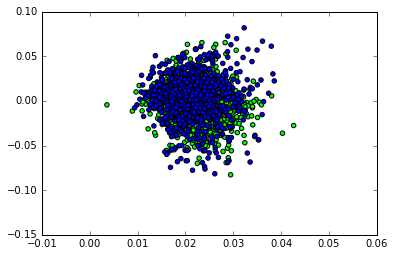

In [151]:
py.scatter(totalTF2.components_[0], totalTF2.components_[1],c= dataset.target, cmap=cmap_bold,marker='o')

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 3".